In [2]:
import sqlite3
# connect to existing database
conn = sqlite3.connect('.\sql_db\pandemic.db')
cur = conn.cursor()

In [3]:
# create COVID Fact table in database
cur.execute('''CREATE TABLE COVID(
                  LOC_ID Varchar(3) NOT NULL,
                  T_ID INTEGER NOT NULL,
                  VAC_ID Varchar(3) NOT NULL,
                  V_ID Varchar(3) NOT NULL,
                  TRG_ID Varchar(3) NOT NULL,
                  Current_Cases INTEGER NOT NULL,
                  New_Cases INTEGER NOT NULL,
                  Recovered_Cases INTEGER NOT NULL,
                  Deaths INTEGER NOT NULL,
                  Doses_Received INTEGER NOT NULL,
                  Dose_1st INTEGER NOT NULL,
                  Dose_2nd INTEGER NOT NULL,
                  Dose_3rd INTEGER NOT NULL,
                  ICU_Cases INTEGER NOT NULL,
                  Source Varchar(25) NOT NULL,
                  PRIMARY KEY(LOC_ID,T_ID,VAC_ID,V_ID,TRG_ID)
                  FOREIGN KEY (LOC_ID) REFERENCES LOCATION(LOC_ID),
                  FOREIGN KEY (T_ID) REFERENCES TIME(T_ID),
                  FOREIGN KEY (VAC_ID) REFERENCES VACCINE(VAC_ID),
                  FOREIGN KEY (V_ID) REFERENCES VIRUS(V_ID),
                  FOREIGN KEY (TRG_ID) REFERENCES TARGET_GROUP(TRG_ID));
                ''')
# commit and save changes to database
conn.commit()


In [4]:
import pandas as pd
covid_data=pd.read_excel('/content/sample_data/COVID.xlsx')
covid_data.head(10)

,LOC_ID,T_ID,VAC_ID,V_ID,TRG_ID,Current_Cases,New_Cases,Recovered_Cases,Deaths,Doses_Received,Dose_1st,Dose_2nd,Dose_3rd,ICU_Cases,Source
0,BEL,2001,MD,OMR,ALL,984358,97656,38351,12315,265399,130220,72293,62886,13067,TESSy Covid
1,BEL,2001,JA,OMR,ALL,984358,97656,38351,12315,302645,162063,83434,57148,13067,TESSy Covid
2,BEL,2001,NV,OMR,ALL,984358,97656,38351,12315,323901,182018,83131,58752,13067,TESSy Covid
3,BEL,2002,MD,OMR,ALL,1041833,80817,35360,13980,289630,148546,73359,67725,17441,TESSy Covid
4,BEL,2002,JA,OMR,ALL,1041833,80817,35360,13980,240313,104208,84196,51909,17441,TESSy Covid
5,BEL,2002,NV,OMR,ALL,1041833,80817,35360,13980,363437,196620,97211,69606,17441,TESSy Covid
6,BEL,2003,MD,OMR,ALL,1081086,57839,42734,14148,250390,106374,80142,63874,17714,TESSy Covid
7,BEL,2003,JA,OMR,ALL,1081086,57839,42734,14148,289136,135233,98913,54990,17714,TESSy Covid
8,BEL,2003,NV,OMR,ALL,1081086,57839,42734,14148,325433,191294,73312,60827,17714,TESSy Covid
9,BEL,2004,MD,OMR,ALL,1089714,47236,41872,13383,272289,114719,97131,60439,13088,TESSy Covid


In [5]:
covid_data.to_sql("COVID",conn,if_exists = 'append',index=False)

144

In [30]:
DF_COVID=pd.read_sql_query('select * from COVID;',conn)
DF_COVID

,LOC_ID,T_ID,VAC_ID,V_ID,TRG_ID,Current_Cases,New_Cases,Recovered_Cases,Deaths,Doses_Received,Dose_1st,Dose_2nd,Dose_3rd,ICU_Cases,Source
0,BEL,2001,MD,OMR,ALL,984358,97656,38351,12315,265399,130220,72293,62886,13067,TESSy Covid
1,BEL,2001,JA,OMR,ALL,984358,97656,38351,12315,302645,162063,83434,57148,13067,TESSy Covid
2,BEL,2001,NV,OMR,ALL,984358,97656,38351,12315,323901,182018,83131,58752,13067,TESSy Covid
3,BEL,2002,MD,OMR,ALL,1041833,80817,35360,13980,289630,148546,73359,67725,17441,TESSy Covid
4,BEL,2002,JA,OMR,ALL,1041833,80817,35360,13980,240313,104208,84196,51909,17441,TESSy Covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,AUS,2011,VL,OMR,ALL,756300,37837,32119,13679,334812,178096,96870,59846,19184,Country_Website
140,AUS,2011,MO,OMR,ALL,756300,37837,32119,13679,334367,190979,83839,59549,19184,Country_Website
141,AUS,2012,MD,OMR,ALL,754071,59403,38005,12423,285409,129113,91404,64892,14258,Country_Website
142,AUS,2012,VL,OMR,ALL,754071,59403,38005,12423,258940,115461,78060,65419,14258,Country_Website


In [7]:
# create table in database
cur.execute('''CREATE TABLE LOCATION(
                LOC_ID Varchar(3) PRIMARY KEY NOT NULL,
                  Country Varchar(50) NOT NULL,
                  Region Varchar(50) NOT NULL,
                  Population numeric NOT NULL);
                ''')


# commit and save changes to database
conn.commit()

In [8]:
# Insert maultiple values into table at once
values = [('BEL','Belgium','Europe',8932664),
         ('DNK','Denmark','Europe',5840045),
         ('FRA','France','Europe',7656682),
         ('AUS','Australia','Asia Pacific',6245329),
         ('NZL','New Zealand','Asia Pacific',4712289),
         ('MLY','Malaysia','Asia Pacific',8723128)
            ]
cur.executemany('Insert Into LOCATION Values (?,?,?,?)', values)


In [9]:
cur.execute('select * from LOCATION;').fetchall()

[('BEL', 'Belgium', 'Europe', 8932664),
 ('DNK', 'Denmark', 'Europe', 5840045),
 ('FRA', 'France', 'Europe', 7656682),
 ('AUS', 'Australia', 'Asia Pacific', 6245329),
 ('NZL', 'New Zealand', 'Asia Pacific', 4712289),
 ('MLY', 'Malaysia', 'Asia Pacific', 8723128)]

In [10]:
# create table in database
cur.execute('''CREATE TABLE TIME(
                T_ID integer PRIMARY KEY NOT NULL,
                  Year integer NOT NULL,
                  Month Varchar(10) NOT NULL,
                  Date date NOT NULL);
                ''')


# commit and save changes to database
conn.commit()

In [11]:
# Insert maultiple values into table at once
time_values = [('2001','2020','January','NULL'),
              ('2002','2020','February','NULL'),
              ('2003','2020','March','NULL'),
              ('2004','2020','April','NULL'),
              ('2005','2020','May','NULL'),
              ('2006','2020','June','NULL'),
              ('2007','2020','July','NULL'),
              ('2008','2020','August','NULL'),
              ('2009','2020','September','NULL'),
              ('2010','2020','October','NULL'),
              ('2011','2020','November','NULL'),
              ('2012','2020','December','NULL')
            ]
cur.executemany('Insert Into TIME Values (?,?,?,?)', time_values)

In [12]:
cur.execute('select * from TIME;').fetchall()

[(2001, 2020, 'January', 'NULL'),
 (2002, 2020, 'February', 'NULL'),
 (2003, 2020, 'March', 'NULL'),
 (2004, 2020, 'April', 'NULL'),
 (2005, 2020, 'May', 'NULL'),
 (2006, 2020, 'June', 'NULL'),
 (2007, 2020, 'July', 'NULL'),
 (2008, 2020, 'August', 'NULL'),
 (2009, 2020, 'September', 'NULL'),
 (2010, 2020, 'October', 'NULL'),
 (2011, 2020, 'November', 'NULL'),
 (2012, 2020, 'December', 'NULL')]

In [13]:
# create table in database
cur.execute('''CREATE TABLE VACCINE(
                VAC_ID Varchar(5) PRIMARY KEY NOT NULL,
                  Name Varchar(50) NOT NULL);
                ''')


# commit and save changes to database
conn.commit()

In [14]:
# Insert maultiple values into table at once
Vaccine_values = [('MD','MOD'),
                  ('JA','JANSS'),
                  ('NV','NVXD'),
                  ('VL','VLA'),
                  ('MO','MODBA.1')
            ]
cur.executemany('Insert Into VACCINE Values (?,?)', Vaccine_values)

In [15]:
cur.execute('select * from VACCINE;').fetchall()

[('MD', 'MOD'),
 ('JA', 'JANSS'),
 ('NV', 'NVXD'),
 ('VL', 'VLA'),
 ('MO', 'MODBA.1')]

In [16]:
# create table in database
cur.execute('''CREATE TABLE TARGET_GROUP(
                TRG_ID Varchar(10) PRIMARY KEY NOT NULL,
                  Age_range Varchar(50) NOT NULL);
                ''')


# commit and save changes to database
conn.commit()

In [17]:
cur.execute('''insert into TARGET_GROUP Values
('ALL','ALL');''')

In [18]:
cur.execute('select * from TARGET_GROUP;').fetchall()

[('ALL', 'ALL')]

In [19]:
# create table in database
cur.execute('''CREATE TABLE VIRUS(
                V_ID Varchar(5) PRIMARY KEY NOT NULL,
                  Name Varchar(50) NOT NULL,
                  Infection_rate integer NOT NULL);
                ''')


# commit and save changes to database
conn.commit()

In [20]:
cur.execute('''insert into VIRUS Values
('OMR','SARS-CoV-2','70');''')

In [21]:
cur.execute('select * from VIRUS;').fetchall()

[('OMR', 'SARS-CoV-2', 70)]

CREATING VIEW for COVID 19 DATA

In [23]:
cur.executescript('''CREATE VIEW COVID19_DATA
               AS
               Select
                          loc.Region,
                          loc.Country,
                          tim.Month,
                          case when tim.Month in ('January','February','March') then 1
                          when tim.Month in ('April','May','June') then 2
                          when tim.Month in ('July','August','September') then 3
                          when tim.Month in ('October','November','December') then 4 end as Quarter,
                          tim.Year,
                          loc.Population,
                          v.Name as Virus_Name,
                          v.Infection_Rate,
                          a.Current_Cases,
                          a.New_Cases,
                          (a.Current_Cases+a.New_Cases) as Covid_Cases,
                          a.Deaths,
                          a.ICU_Cases,
                          a.Source,
                          trg.Age_Range,
                          vac.Name as Vaccine_Name,
                          (ROUND((CAST(a.Doses_Received as float)/CAST(loc.Population as float))*100,2)) as Vaccination_Rate, 
                          a.Doses_Received,
                          a.Dose_1st as Dose_1st,
                          a.Dose_2nd as Dose_2nd,
                          a.Dose_3rd as Dose_3rd,
                          tim.T_ID as Month_id
 from COVID a 
 left join LOCATION loc on a.LOC_ID=loc.LOC_ID
 left join TIME tim on a.T_ID=tim.T_ID
 left join VACCINE vac on a.VAC_ID=vac.VAC_ID
 left join VIRUS v on v.V_ID=a.V_ID
 left join TARGET_GROUP trg on trg.TRG_ID=a.TRG_ID
 group by loc.Region,loc.Country,tim.Month,vac.Name,Source
 order by loc.region,loc.Country,a.T_ID,Source;''')
# commit and save changes to database
conn.commit()

In [31]:
View_Covid19_Data = pd.read_sql_query('''Select * from COVID19_DATA''', conn)
View_Covid19_Data

,Region,Country,Month,Quarter,Year,Population,Virus_Name,Infection_rate,Current_Cases,New_Cases,...,ICU_Cases,Source,Age_range,Vaccine_Name,Vaccination_Rate,Doses_Received,Dose_1st,Dose_2nd,Dose_3rd,Month_id
0,Asia Pacific,Australia,January,1,2020,6245329,SARS-CoV-2,70,495649,98411,...,18515,Country_Website,ALL,MOD,4.16,260019,105036,89446,65537,2001
1,Asia Pacific,Australia,January,1,2020,6245329,SARS-CoV-2,70,495649,98411,...,18515,Country_Website,ALL,MODBA.1,4.19,261735,119945,73062,68728,2001
2,Asia Pacific,Australia,January,1,2020,6245329,SARS-CoV-2,70,495649,98411,...,18515,Country_Website,ALL,VLA,5.33,332944,172127,91544,69273,2001
3,Asia Pacific,Australia,February,1,2020,6245329,SARS-CoV-2,70,543693,60736,...,20050,Country_Website,ALL,MOD,5.67,354183,193096,95568,65519,2002
4,Asia Pacific,Australia,February,1,2020,6245329,SARS-CoV-2,70,543693,60736,...,20050,Country_Website,ALL,MODBA.1,5.26,328309,190552,85814,51943,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Europe,France,November,4,2020,7656682,SARS-CoV-2,70,1042128,44497,...,15823,TESSy Covid,ALL,MOD,3.67,280996,146184,69000,50612,2011
140,Europe,France,November,4,2020,7656682,SARS-CoV-2,70,1042128,44497,...,15823,TESSy Covid,ALL,NVXD,4.53,346787,168522,95285,67780,2011
141,Europe,France,December,4,2020,7656682,SARS-CoV-2,70,1059514,29712,...,18361,TESSy Covid,ALL,JANSS,3.30,252736,91496,95088,50952,2012
142,Europe,France,December,4,2020,7656682,SARS-CoV-2,70,1059514,29712,...,18361,TESSy Covid,ALL,MOD,3.40,260120,99084,78779,67057,2012


**1.	For each region and month report the COVID-19 cases and deaths, Intensive care unit (ICU) cases as reported by different sources and vaccination rates for each vaccine.**

In [25]:
REGION_MONTH = pd.read_sql_query('''
Select 
Region,
Month,
Year,
Sum(Covid_Cases) as Covid_Cases,
Sum(Deaths) as Deaths,
Sum(ICU_Cases) as ICU_Cases,
Source,
Vaccine_Name,
Sum(Vaccination_Rate) as Vaccination_Rate
from COVID19_DATA
group by Region,Month,Vaccine_Name
order by Region,Month_id
''', conn)

print(REGION_MONTH.to_string())

          Region      Month  Year  Covid_Cases  Deaths  ICU_Cases           Source Vaccine_Name  Vaccination_Rate
0   Asia Pacific    January  2020      1054461   27237      40577  Country_Website          MOD              9.68
1   Asia Pacific    January  2020      1054461   27237      40577  Country_Website      MODBA.1              9.74
2   Asia Pacific    January  2020      1054461   27237      40577  Country_Website          VLA             12.40
3   Asia Pacific   February  2020      1075199   28823      43647  Country_Website          MOD             13.19
4   Asia Pacific   February  2020      1075199   28823      43647  Country_Website      MODBA.1             12.23
5   Asia Pacific   February  2020      1075199   28823      43647  Country_Website          VLA              9.63
6   Asia Pacific      March  2020      1103523   28247      41367  Country_Website          MOD             11.79
7   Asia Pacific      March  2020      1103523   28247      41367  Country_Website      

**2**.	**For each country and quarter report the COVID-19 cases and deaths, Intensive care unit cases and vaccination rates for each vaccine.**	

In [26]:
COUNTRY_QUARTER = pd.read_sql_query('''Select 
Country,
Quarter,
Year,
Sum(Covid_Cases) as Covid_Cases,
Sum(Deaths) as Deaths,
Sum(ICU_Cases) as ICU_Cases,
Vaccine_Name,
round(sum(Vaccination_Rate),2) as Vaccination_Rate
from COVID19_DATA
group by Country,Quarter,Vaccine_Name;''', conn)

print(COUNTRY_QUARTER.to_string())

        Country  Quarter  Year  Covid_Cases  Deaths  ICU_Cases Vaccine_Name  Vaccination_Rate
0     Australia        1  2020      1817080   38618      57475          MOD             14.90
1     Australia        1  2020      1817080   38618      57475      MODBA.1             13.87
2     Australia        1  2020      1817080   38618      57475          VLA             14.38
3     Australia        2  2020      2076828   40858      41871          MOD             14.24
4     Australia        2  2020      2076828   40858      41871      MODBA.1             14.50
5     Australia        2  2020      2076828   40858      41871          VLA             15.44
6     Australia        3  2020      2181553   38567      47874          MOD             12.38
7     Australia        3  2020      2181553   38567      47874      MODBA.1             14.60
8     Australia        3  2020      2181553   38567      47874          VLA             13.25
9     Australia        4  2020      2408941   38471      480

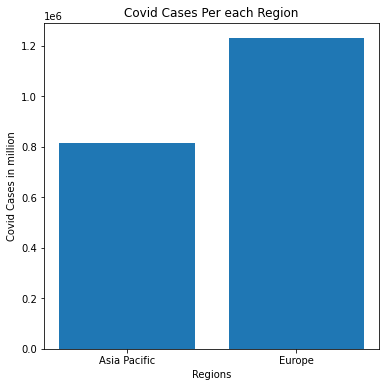

In [ ]:
#Covid Cases per each Region
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of Class Variable
plt.figure(figsize=(6,6))
plt.bar(df['Region'],df['Covid_Cases'])
plt.title('Covid Cases Per each Region')
plt.xlabel('Regions')
plt.ylabel('Covid Cases in million')
plt.show()

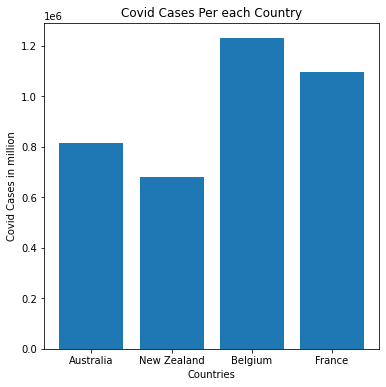

In [ ]:
#Covid Cases per each Country
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of Class Variable
plt.figure(figsize=(6,6))
plt.bar(df['Country'],df['Covid_Cases'])
plt.title('Covid Cases Per each Country')
plt.xlabel('Countries')
plt.ylabel('Covid Cases in million')
plt.show()

<Axes: xlabel='Country'>

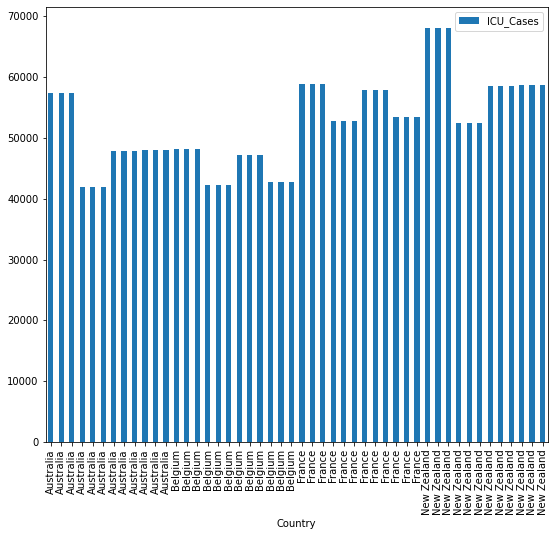

In [ ]:
COUNTRY_QUARTER.plot(x="Country", y=["ICU_Cases"], kind="bar", figsize=(9, 8))